In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

In [20]:
file = 'C:/Users/Dell/Desktop/flip internship/EMAIL-SPAM-CLASSIFIER-main/spam.csv'

In [21]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [22]:
data = pd.read_csv(file,encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
data.shape

(5572, 5)

In [24]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

                                        Check percentage of missing columns

In [26]:
# Check percentage of Unnamed: 2

print('Unnamed: 2:',data['Unnamed: 2'].isnull().sum()/len(data['Unnamed: 2'])*100)  
print('Unnamed: 3:',data['Unnamed: 3'].isnull().sum()/len(data['Unnamed: 3'])*100)
print('Unnamed: 4:',data['Unnamed: 4'].isnull().sum()/len(data['Unnamed: 4'])*100)

Unnamed: 2: 99.10265613783201
Unnamed: 3: 99.78463747307968
Unnamed: 4: 99.89231873653985


Remove Unnamed: 2, Unnamed: 3 and Unnamed: 4 columns from the dataset because of 99% data is missing.

In [27]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Add length column of v2 

In [28]:
data['v2_length']=data['v2'].str.len()

In [29]:
data.head()

,v1,v2,v2_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Check the target variable is balanced or not, so this is an imbalanced dataset

In [30]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

                                               Check duplicacy

In [31]:
data[data['v2'].duplicated()]

,v1,v2,v2_length
102,ham,As per your request 'Melle Melle (Oru Minnamin...,160
153,ham,As per your request 'Melle Melle (Oru Minnamin...,160
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",156
222,ham,"Sorry, I'll call later",22
325,ham,No calls..messages..missed calls,32
...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,153
5535,ham,"I know you are thinkin malaria. But relax, chi...",329
5539,ham,Just sleeping..and surfing,26
5553,ham,Hahaha..use your brain dear,27


There are four hundred three rows which are duplicated, so we delete those rows otherwise it biased our dataset.

In [32]:
data=data.drop_duplicates()

In [33]:
data.reset_index()

data.head()

,v1,v2,v2_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
data.shape

(5169, 3)

In [35]:
data.isnull().sum()

v1           0
v2           0
v2_length    0
dtype: int64

In [36]:
data['v2_length']=data['v2_length'].fillna(data['v2_length'].mode()[0])

                                    Remove unneccessary words in the rows

In [37]:
data['v2']=data['v2'].str.lower()

data['v2']=data['v2'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','')

data['v2'] = data['v2'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','')

data['v2'] = data['v2'].str.replace(r'£|\$', '')

data['v2'] = data['v2'].str.replace(r'\d+(\.\d+)?', '')

In [38]:
# remove stopwords

stop= stopwords.words('english')

data['v2'] = data['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [39]:
# remove punctuation

data['v2'] = data['v2'].str.strip().str.replace('[^\w\s]', '')

# Data Visualisation

ham     4516
spam     653
Name: v1, dtype: int64


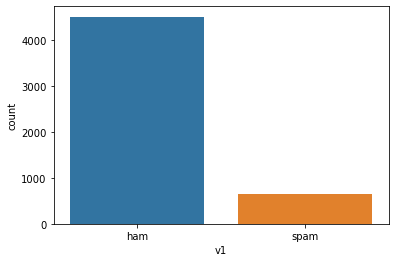

In [40]:
ax= sns.countplot(x='v1',data=data)
print(data['v1'].value_counts())

<AxesSubplot:xlabel='v2_length', ylabel='Density'>

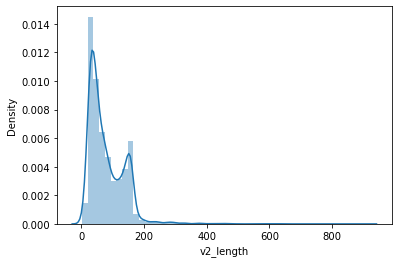

In [41]:
sns.distplot(data['v2_length'])

                                        Encoding Technique

In [42]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [43]:
data.head()

,v1,v2,v2_length
0,0.0,1212.0,111
1,0.0,3003.0,29
2,1.0,1062.0,155
3,0.0,4255.0,49
4,0.0,2685.0,61


# Data Analysis

In [44]:
data.describe()

,v1,v2,v2_length
count,5169.000000,5169.000000,5169.000000
mean,0.126330,2547.759721,78.977945
std,0.332253,1472.191686,58.236293
min,0.000000,0.000000,2.000000
25%,0.000000,1271.000000,36.000000
50%,0.000000,2555.000000,60.000000
75%,0.000000,3821.000000,117.000000
max,1.000000,5094.000000,910.000000


<AxesSubplot:>

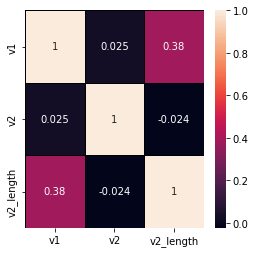

In [45]:
plt.figure(figsize=(4,4))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

In [46]:
data['v2_length'].skew()

2.610099671137596

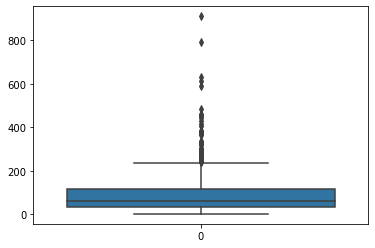

In [47]:
ax = sns.boxplot(data=data['v2_length'])

v2_length is positively skewed and also have an ouliers

                                          Removing outliers

In [48]:
q1 = data.quantile(0.25)

q3 = data.quantile(0.75)

iqr = q3-q1

In [49]:
v2_len_high = (q3.v2_length + (1.5 * iqr.v2_length))
print(v2_len_high)

index = np.where(data['v2_length'] > v2_len_high)

data = data.drop(data.index[index])
print(data.shape)

238.5
(5103, 3)


In [50]:
data.head()

,v1,v2,v2_length
0,0.0,1212.0,111
1,0.0,3003.0,29
2,1.0,1062.0,155
3,0.0,4255.0,49
4,0.0,2685.0,61


# Data Modeling

In [51]:
x=data.drop(['v1'],axis=1)
y=data['v1']

                                            Logistic Regression

In [52]:
lr=LogisticRegression()

In [53]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 86.6461366181411
Testing accuracy score: 85.56499020248204


random state 1
Training accuracy score: 86.89809630459126
Testing accuracy score: 87.13259307642063


random state 2
Training accuracy score: 86.95408734602464
Testing accuracy score: 86.28347485303723


random state 3
Training accuracy score: 86.89809630459126
Testing accuracy score: 86.93664271717832


random state 4
Training accuracy score: 86.75811870100783
Testing accuracy score: 87.26322664924886


random state 5
Training accuracy score: 87.20604703247481
Testing accuracy score: 85.95689092096669


random state 6
Training accuracy score: 87.2340425531915
Testing accuracy score: 86.8060091443501


random state 7
Training accuracy score: 86.78611422172452
Testing accuracy score: 88.04702808621816


random state 8
Training accuracy score: 87.2340425531915
Testing accuracy score: 87.13259307642063


random state 9
Training accuracy score: 87.26203807390817
Testing accuracy score: 86.2

Training accuracy score: 86.6461366181411
Testing accuracy score: 87.39386022207707


random state 83
Training accuracy score: 87.12206047032474
Testing accuracy score: 86.74069235793598


random state 84
Training accuracy score: 86.61814109742441
Testing accuracy score: 86.28347485303723


random state 85
Training accuracy score: 87.20604703247481
Testing accuracy score: 86.93664271717832


random state 86
Training accuracy score: 87.51399776035834
Testing accuracy score: 86.02220770738079


random state 87
Training accuracy score: 86.98208286674132
Testing accuracy score: 86.61005878510777


random state 88
Training accuracy score: 86.67413213885779
Testing accuracy score: 87.45917700849118


random state 89
Training accuracy score: 86.75811870100783
Testing accuracy score: 85.04245591116917


random state 90
Training accuracy score: 86.53415453527435
Testing accuracy score: 88.37361201828871


random state 91
Training accuracy score: 87.09406494960807
Testing accuracy score: 86.2834

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=15) 

In [55]:
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred1)*100
print("accuracy score:",accuracy)

accuracy score: 86.08752449379492


In [56]:
cm= confusion_matrix(y_test,y_pred1)
print(cm)

[[1288   46]
 [ 167   30]]


In [57]:
clr=classification_report(y_test,y_pred1)
print(clr)

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.92      1334
         1.0       0.39      0.15      0.22       197

    accuracy                           0.86      1531
   macro avg       0.64      0.56      0.57      1531
weighted avg       0.82      0.86      0.83      1531



In [58]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred1)

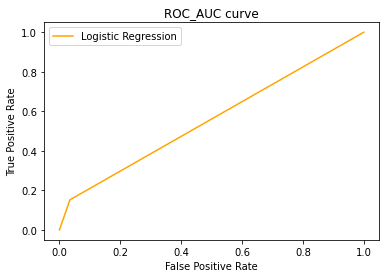

AUC_score 55.89007526693507


In [59]:
plt.plot(fpr,tpr,color='orange',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred1)*100
print("AUC_score",auc_score)

                                               K Neighbors Classifier

In [60]:
knn= KNeighborsClassifier()

In [61]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 94.0649496080627
Testing accuracy score: 91.63945133899412


random state 1
Training accuracy score: 94.20492721164614
Testing accuracy score: 91.05160026126714


random state 2
Training accuracy score: 94.00895856662935
Testing accuracy score: 91.11691704768126


random state 3
Training accuracy score: 93.92497200447927
Testing accuracy score: 90.7250163291966


random state 4
Training accuracy score: 93.75699888017918
Testing accuracy score: 91.31286740692359


random state 5
Training accuracy score: 94.26091825307951
Testing accuracy score: 89.94121489222731


random state 6
Training accuracy score: 93.58902575587906
Testing accuracy score: 91.70476812540824


random state 7
Training accuracy score: 93.61702127659575
Testing accuracy score: 91.57413455258


random state 8
Training accuracy score: 93.47704367301232
Testing accuracy score: 90.79033311561071


random state 9
Training accuracy score: 94.2889137737962
Testing accuracy score: 90.855

random state 80
Training accuracy score: 94.00895856662935
Testing accuracy score: 91.4435009797518


random state 81
Training accuracy score: 93.7010078387458
Testing accuracy score: 91.63945133899412


random state 82
Training accuracy score: 93.42105263157895
Testing accuracy score: 90.98628347485304


random state 83
Training accuracy score: 94.09294512877939
Testing accuracy score: 89.35336381450033


random state 84
Training accuracy score: 94.20492721164614
Testing accuracy score: 90.98628347485304


random state 85
Training accuracy score: 93.64501679731244
Testing accuracy score: 91.11691704768126


random state 86
Training accuracy score: 94.03695408734603
Testing accuracy score: 91.18223383409536


random state 87
Training accuracy score: 93.75699888017918
Testing accuracy score: 91.24755062050947


random state 88
Training accuracy score: 94.03695408734603
Testing accuracy score: 91.4435009797518


random state 89
Training accuracy score: 94.03695408734603
Testing accuracy 

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=7) 

In [63]:
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred2)*100
print("accuracy score:",accuracy)

accuracy score: 91.57413455258


In [64]:
cm= confusion_matrix(y_test,y_pred2)
print(cm)

[[1301   52]
 [  77  101]]


In [65]:
clr=classification_report(y_test,y_pred2)
print(clr)

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1353
         1.0       0.66      0.57      0.61       178

    accuracy                           0.92      1531
   macro avg       0.80      0.76      0.78      1531
weighted avg       0.91      0.92      0.91      1531



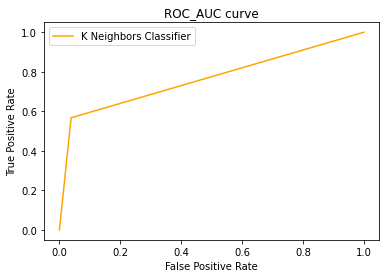

AUC_score 76.44913093666177


In [66]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)

plt.plot(fpr,tpr,color='orange',label='K Neighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred2)*100
print("AUC_score",auc_score)

                                              Random Forest Classifier

In [67]:
rfc=RandomForestClassifier()

In [68]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 91.5088177661659


random state 1
Training accuracy score: 99.97200447928331
Testing accuracy score: 91.5088177661659


random state 2
Training accuracy score: 100.0
Testing accuracy score: 90.46374918354016


random state 3
Training accuracy score: 100.0
Testing accuracy score: 90.46374918354016


random state 4
Training accuracy score: 100.0
Testing accuracy score: 92.2273024167211


random state 5
Training accuracy score: 100.0
Testing accuracy score: 91.37818419333769


random state 6
Training accuracy score: 100.0
Testing accuracy score: 90.59438275636839


random state 7
Training accuracy score: 100.0
Testing accuracy score: 92.03135205747877


random state 8
Training accuracy score: 99.94400895856663
Testing accuracy score: 91.18223383409536


random state 9
Training accuracy score: 100.0
Testing accuracy score: 90.39843239712606


random state 10
Training accuracy score: 100.0
Testing accuracy score: 91.63945

random state 89
Training accuracy score: 100.0
Testing accuracy score: 90.79033311561071


random state 90
Training accuracy score: 99.97200447928331
Testing accuracy score: 92.61920313520575


random state 91
Training accuracy score: 100.0
Testing accuracy score: 91.70476812540824


random state 92
Training accuracy score: 100.0
Testing accuracy score: 91.63945133899412


random state 93
Training accuracy score: 100.0
Testing accuracy score: 92.03135205747877


random state 94
Training accuracy score: 100.0
Testing accuracy score: 91.18223383409536


random state 95
Training accuracy score: 100.0
Testing accuracy score: 91.4435009797518


random state 96
Training accuracy score: 100.0
Testing accuracy score: 90.85564990202482


random state 97
Training accuracy score: 100.0
Testing accuracy score: 91.05160026126714


random state 98
Training accuracy score: 100.0
Testing accuracy score: 91.4435009797518


random state 99
Training accuracy score: 100.0
Testing accuracy score: 90.790333

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=14)

In [70]:
rfc.fit(x_train,y_train)
y_pred3 = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred3)*100
print("accuracy score:",accuracy)

accuracy score: 91.18223383409536


In [71]:
cm= confusion_matrix(y_test,y_pred3)
print(cm)

[[1298   55]
 [  80   98]]


In [72]:
clr=classification_report(y_test,y_pred3)
print(clr)

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1353
         1.0       0.64      0.55      0.59       178

    accuracy                           0.91      1531
   macro avg       0.79      0.75      0.77      1531
weighted avg       0.91      0.91      0.91      1531



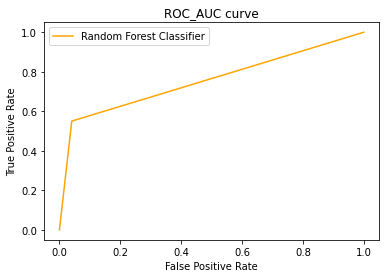

AUC_score 75.4955695624372


In [73]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred3)

plt.plot(fpr,tpr,color='orange',label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred3)*100
print("AUC_score",auc_score)

                                            MultinomialNB

In [74]:
mb=MultinomialNB()

In [75]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    mb.fit(x_train,y_train)
    pred_train=mb.predict(x_train)
    pred_test=mb.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 64.80963045912654
Testing accuracy score: 66.94970607446113


random state 1
Training accuracy score: 64.80963045912654
Testing accuracy score: 66.81907250163292


random state 2
Training accuracy score: 65.17357222844345
Testing accuracy score: 66.10058785107773


random state 3
Training accuracy score: 65.48152295632698
Testing accuracy score: 65.70868713259308


random state 4
Training accuracy score: 64.8936170212766
Testing accuracy score: 65.51273677335075


random state 5
Training accuracy score: 65.81746920492722
Testing accuracy score: 63.35728282168517


random state 6
Training accuracy score: 64.44568868980963
Testing accuracy score: 66.88438928804703


random state 7
Training accuracy score: 64.69764837625979
Testing accuracy score: 66.42717178314827


random state 8
Training accuracy score: 65.4535274356103
Testing accuracy score: 64.14108425865447


random state 9
Training accuracy score: 65.00559910414334
Testing accuracy score: 65

Training accuracy score: 65.0615901455767
Testing accuracy score: 66.23122142390594


random state 83
Training accuracy score: 65.2575587905935
Testing accuracy score: 64.85956890920967


random state 84
Training accuracy score: 65.95744680851064
Testing accuracy score: 63.683866753755716


random state 85
Training accuracy score: 64.78163493840985
Testing accuracy score: 65.77400391900719


random state 86
Training accuracy score: 64.41769316909294
Testing accuracy score: 65.9699542782495


random state 87
Training accuracy score: 64.78163493840985
Testing accuracy score: 65.57805355976485


random state 88
Training accuracy score: 65.34154535274355
Testing accuracy score: 64.79425212279556


random state 89
Training accuracy score: 65.36954087346024
Testing accuracy score: 65.25146962769432


random state 90
Training accuracy score: 65.11758118701007
Testing accuracy score: 64.66361854996734


random state 91
Training accuracy score: 66.09742441209406
Testing accuracy score: 64.72893

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=22)

In [77]:
mb.fit(x_train,y_train)
y_pred4 = mb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred4)*100
print("accuracy score:",accuracy)

accuracy score: 66.55780535597648


In [78]:
cm= confusion_matrix(y_test,y_pred4)
print(cm)

[[892 430]
 [ 82 127]]


In [79]:
clr=classification_report(y_test,y_pred4)
print(clr)

              precision    recall  f1-score   support

         0.0       0.92      0.67      0.78      1322
         1.0       0.23      0.61      0.33       209

    accuracy                           0.67      1531
   macro avg       0.57      0.64      0.55      1531
weighted avg       0.82      0.67      0.72      1531



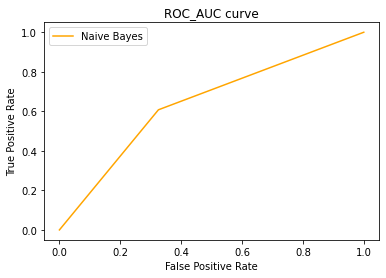

AUC_score 64.11953760070647


In [80]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred4)

plt.plot(fpr,tpr,color='orange',label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred4)*100
print("AUC_score",auc_score)

We worked on different different models, and we get that K Neighbors classifier is the better model for this problem.

                                             Save the file

In [81]:
import joblib

joblib.dump(y_pred2,"Email_spam_classifier.pkl")

['Email_spam_classifier.pkl']

# Conclusion

In [82]:
Prediction=pd.DataFrame({'Actual data':y_test,"Predicted data":y_pred2})
Prediction

,Actual data,Predicted data
4303,0.0,1.0
4686,0.0,0.0
5567,1.0,0.0
3792,0.0,0.0
4380,0.0,0.0
...,...,...
604,0.0,1.0
2746,0.0,0.0
4111,0.0,0.0
1460,0.0,0.0
